<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">  

# Capstone Project



# Music Generation From MIDI with Machine Learning Networks

## Contents

- [Executive Summary](#Executive-Summary)
- [Problem Statement](#Problem-Statement)
- [Background Research](#Background-Research)
- [Future Improvement](#Future-Improvement)
- [Import Data and EDA](#Import-Data-and-EDA)
- [Further EDA](#Further-EDA)
- [Shaping Data for our Model](#Shaping-Data-for-our-Model)
- [Running LSTM-RNN Model](#Running-LSTM-RNN-Model)
- [Generate Music](#Generate-Music)
- [Display and Produce Generated Music](#Display-and-Produce-Generated-Music)
- [Continuation](#Continuation)

---

# Executive Summary
Music generation via Machine Learning has been frequently discussed as computing power increased. The possibility of generating music from Machine Learning models yields opportunities to create music for those who do not have sufficient musical aptitude to write their own, as well as a good opportunity to teach students and hobbyist alike several key concepts in music.

For this project, I have taken MIDI files from https://www.classicalarchives.com/midi/composer/2156.html  
We will be focusing on mostly Beethoven's Sonata.

The music to be used on this project are composed by the famous composer Ludwig Van Beethoven. I have chosen Beethoven because Beethoven was trained on the classical harmonies with Joseph Haydn, and is one of the pioneers of the Romantic era, being one of the pre-Romantic Era composers.

Our MIDI data is imported and one-hot encoded and fed into our 2 models, Long-Short Term Memory Recurrent Neural Network model (LSTM-RNN) and Convolutional Neural Network (CNN). A big bulk of this project was to run the model with different epochs. Running high number of epochs results in huge computational demands and thus we have to optimise our model for computational requirements as well, thus the lack of further exploration with other models due to the enormous computational demands.

Upon listening to our generated music located in our `output` folder, I can hear that both our model is able to learn the concept of keys and key signatures. Generally both models have a downward trend on it's loss and a higher level of accuracy to our training data

On our LSTM-RNN model, we can hear more variation in the melody, which is more interesting. The piece is also rather musically sound as it follows a key signature. There is also use of borrowed chords and keys in our LSTM-RNN generated music.

Our CNN model, however, resulted in bad results. There are frequent repeated notes that indicates a lack of long-term memory for logical rules that we are hoping the model would pick up on.

---

# Problem Statement:
Content creators often face issues with music and audio when creating original content. They often need background music to use, which results in royalty payments, already setting up an upfront cost to even post contents. Some may even try to make their own music, only to find that the music used or composed for their content is too similar to another work. This creates several conflicts of interests in the media industry.

This project aims to mitigate this issue by generating original music for the content produced based in the music fed into the model. Also, this project is attempting to replicate styles of famous composers in the past so that it can stay within a theme for content creators to follow.

---

# Background Research
There is assymetry in the timing of several famous composers. While playing their old works may yield great performances, this project also aim to explore the possibility of training a model to compose music with specific pieces from a composer. In this project I will be using Ludwig Van Beethoven's Piano Sonatas to train our models. After training our models, I will generate an output music.

---

# Future Improvement
#### GPU Acceleration for faster model training
One of the biggest gripes of this project is that it was not ran on a GPU. Given time, I would have preferred to run the process on a GPU instead, which will speed the model up in orders of magnitude. However, Tensorflow was compiled with a much more powerful GPU and thus a different driver altogether and thus causes compatibility issues when attempting to run the model with CUDA acceleration.

#### Pre-train model on MIDI based on Harmonic logics and known musical patterns first
It may also be useful to train harmonic logic rules and known musical patterns into the model prior to training the model based on the composer's style. This may increase the musicality of the generated output.

#### Account for Velocity data in MIDI with additional dimension into our models
Also, this method discards velocity data, which may be a part of Beethoven's signature (Beethoven is known for large dynamic jumps). This could be circumvented by introducing another array of colours to represent velocity before feeding it into the models, however due to the intensity of running the models, it is not feasible to run with velocity data with the current hardware used.

#### Potential Data Cleaning Steps
It may be possible to clean the data further by taking into account of key signatures for each piece, then tagging them to a library of musical technical names, before feeding the data into a one-hot encoder and into our models. This may yield better results. However, as we are using Pretty_MIDI, which should take the keys into account, we will be dropping this method for now.

#### Polyphony in Generated Music
The generated music only produces monophonic output. We can explore the possibility of parallelising more MIDI data with accompaniments and melody to produce more polyphonic music. This can also be done with Baroque music, which usually consist of polyphonic melodies layered on one another.

## Import Libraries

In [1]:
import os
import pretty_midi
from scipy.io import wavfile 
import IPython

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import tensorflow as tf

# Import Data and EDA
We need to import our MIDI data into the notebook. Let's start by creating a list containing the locations of all our MIDI data first.

There is no data cleaning step for this because we are extracting already clean data from the MIDI archives, which is a performance of Beethoven's Sonatas and has no null, missing or outlier datas to begin with.

We will proceed with a key-note EDA on each piece that we import.

Afterwards, we will perform one-hot encoding on our data into an array.

In [2]:
midiFile_l = glob.glob("../assets/raw/*.mid")
# Now the directories for all our midi files are set

appass_1_format0.mid Estimated Tempo is: 176.93 BPM


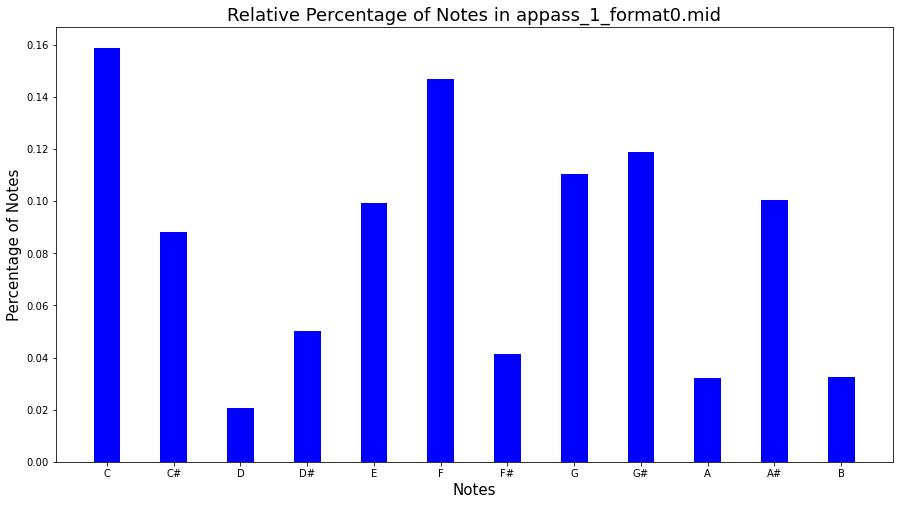

appass_2_format0.mid Estimated Tempo is: 193.12 BPM


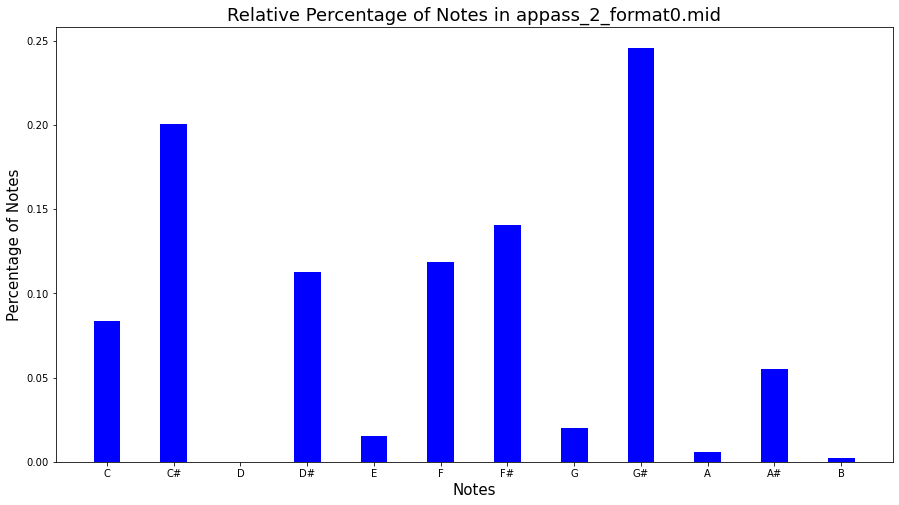

appass_3_format0.mid Estimated Tempo is: 265.26 BPM


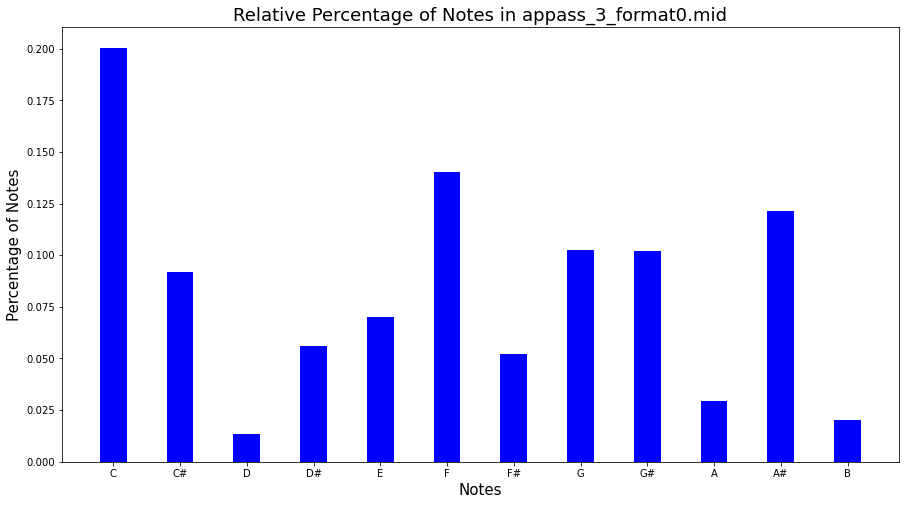

les_adieux_1_format0.mid Estimated Tempo is: 226.06 BPM


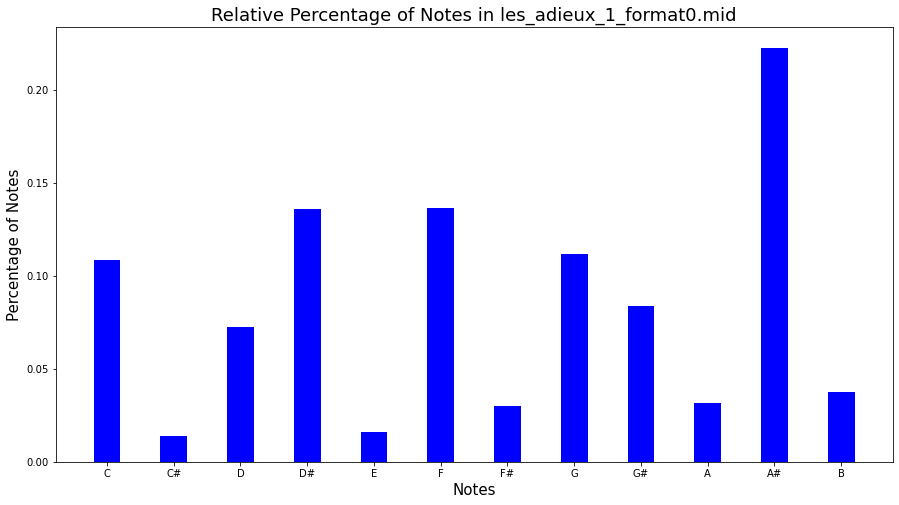

les_adieux_2_format0.mid Estimated Tempo is: 187.69 BPM


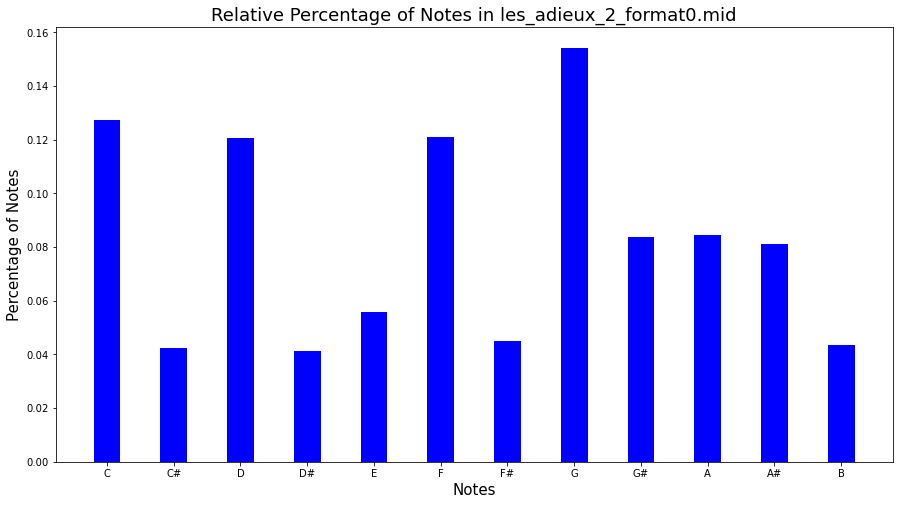

les_adieux_3_format0.mid Estimated Tempo is: 164.34 BPM


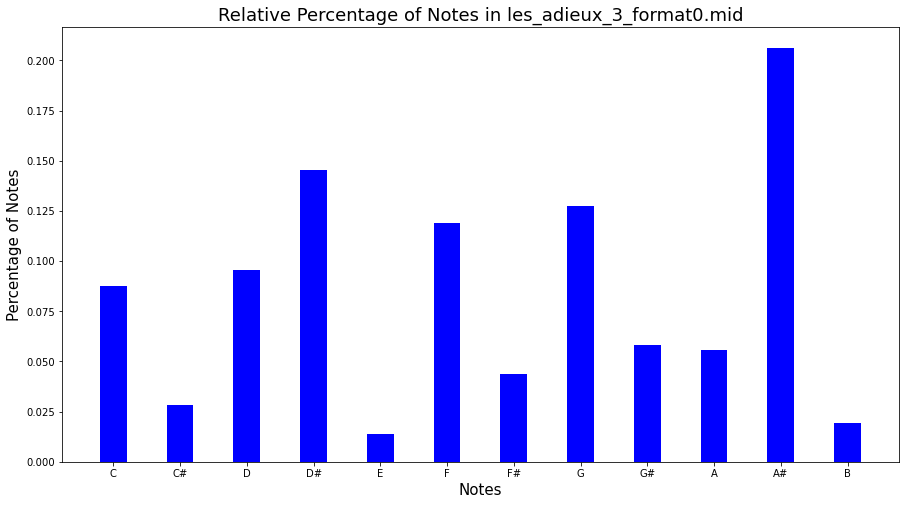

mond_1_format0.mid Estimated Tempo is: 141.05 BPM


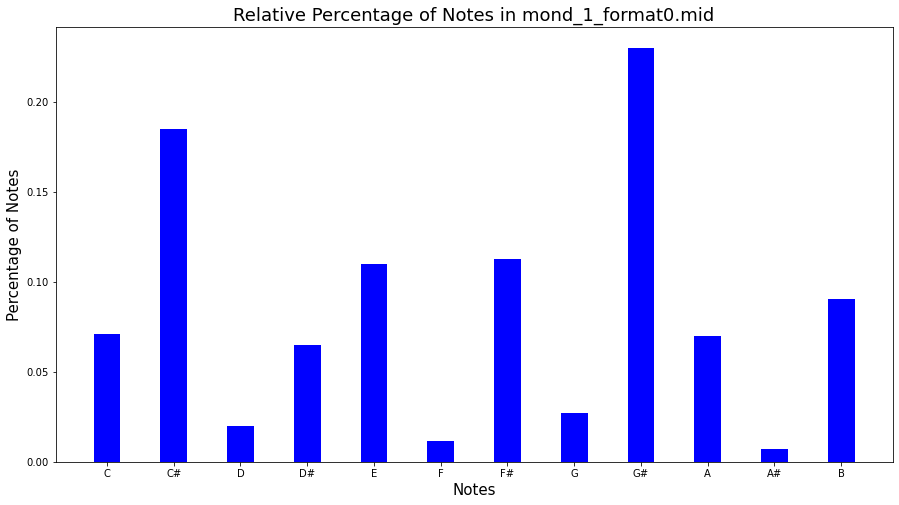

mond_2_format0.mid Estimated Tempo is: 181.84 BPM


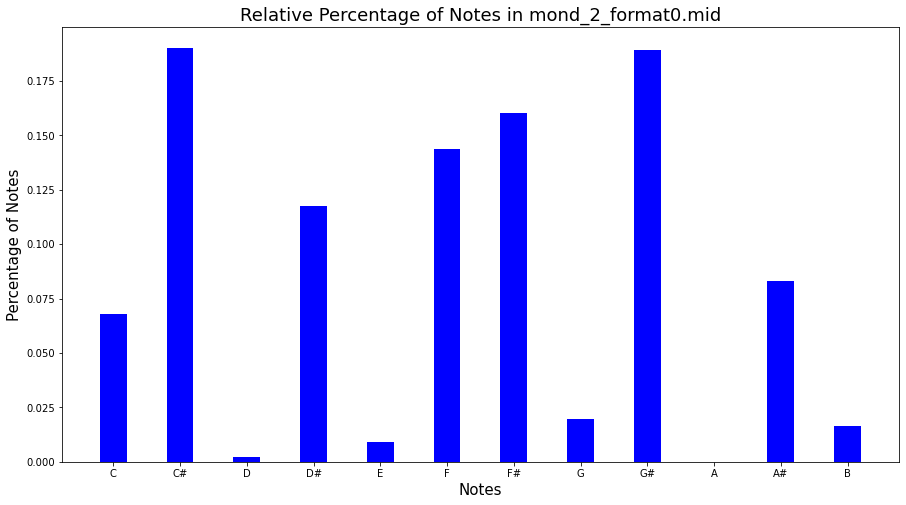

mond_3_format0.mid Estimated Tempo is: 173.36 BPM


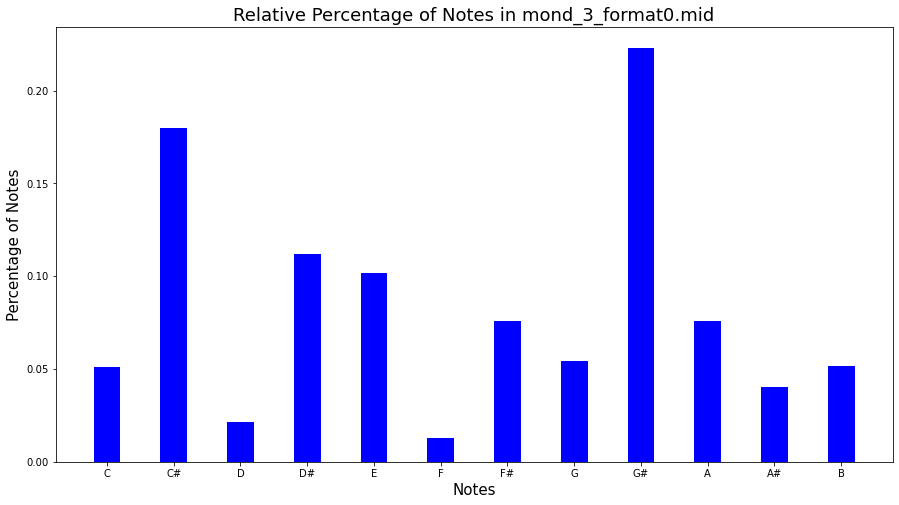

opus10_1_format0.mid Estimated Tempo is: 181.62 BPM


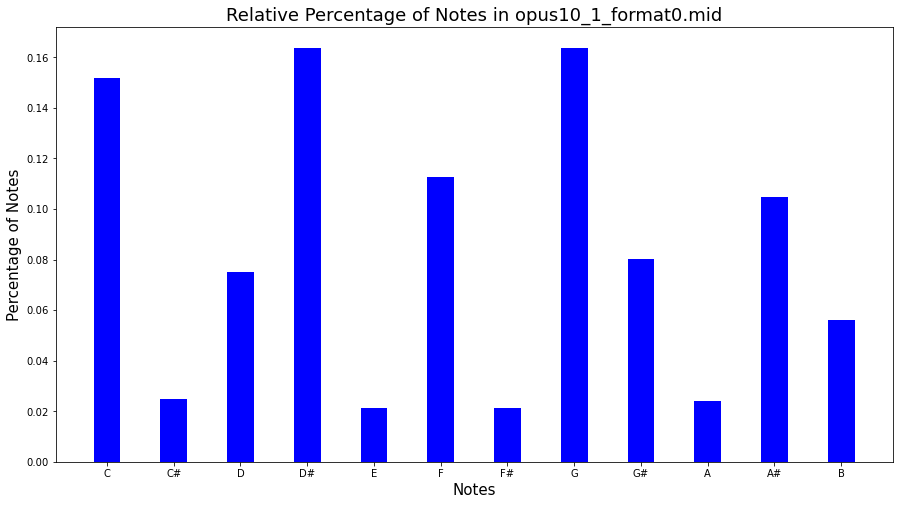

opus10_2_format0.mid Estimated Tempo is: 160.41 BPM


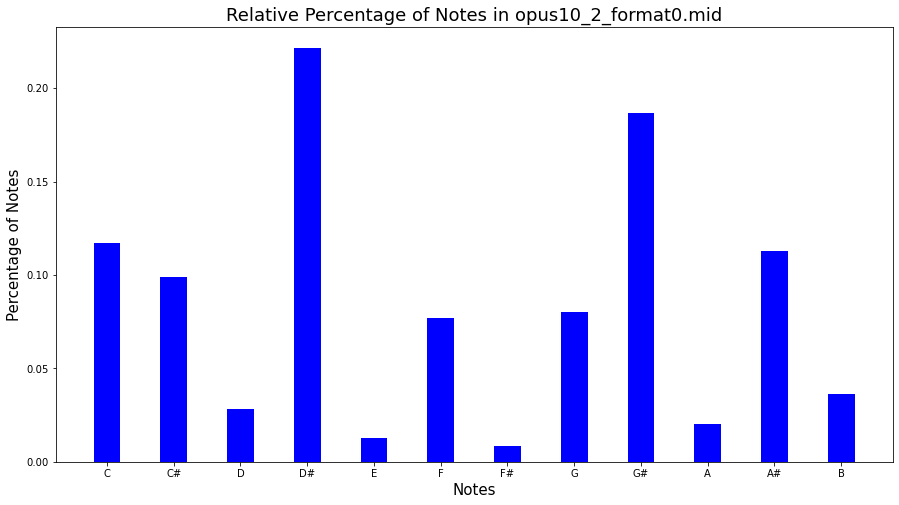

opus10_3_format0.mid Estimated Tempo is: 196.95 BPM


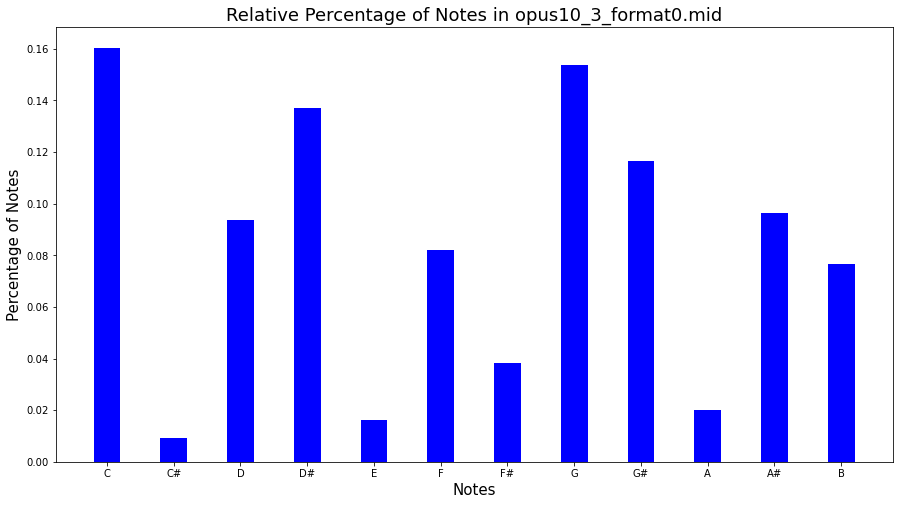

opus22_1_format0.mid Estimated Tempo is: 165.11 BPM


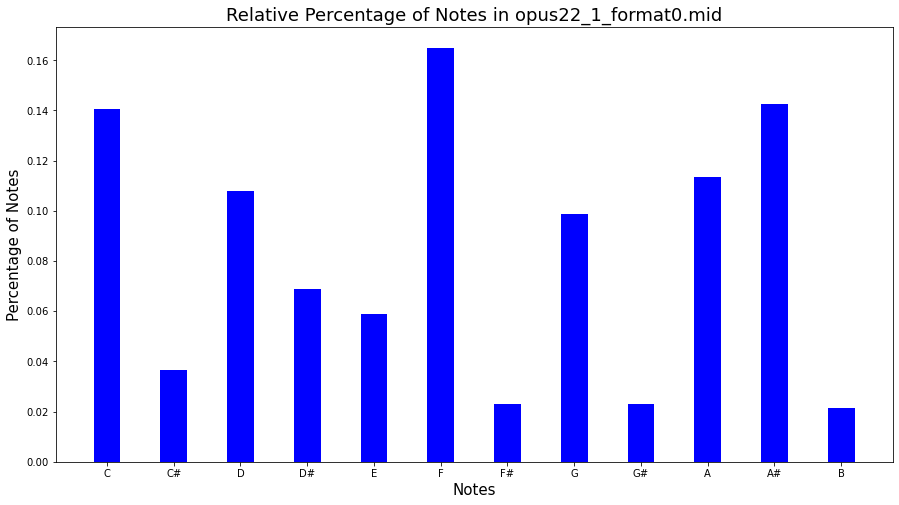

opus22_2_format0.mid Estimated Tempo is: 194.19 BPM


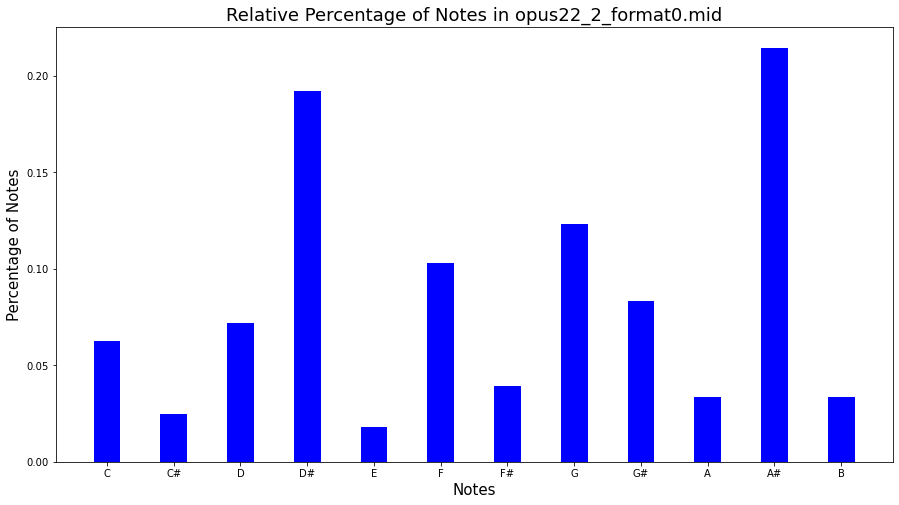

opus22_3_format0.mid Estimated Tempo is: 234.61 BPM


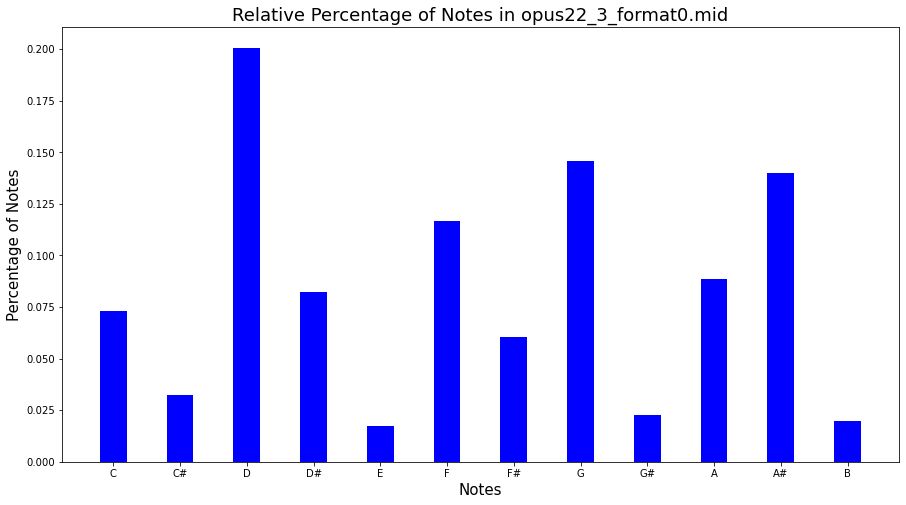

opus22_4_format0.mid Estimated Tempo is: 173.9 BPM


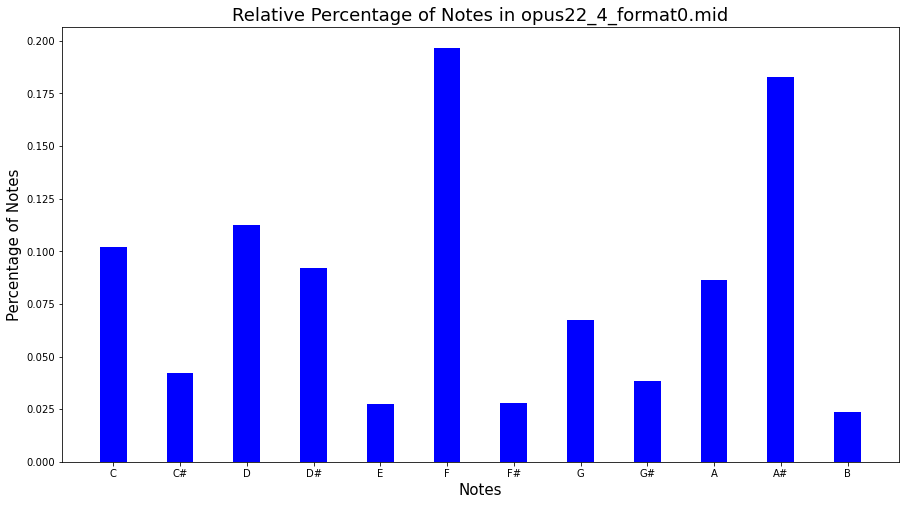

pathetique_1_format0.mid Estimated Tempo is: 188.89 BPM


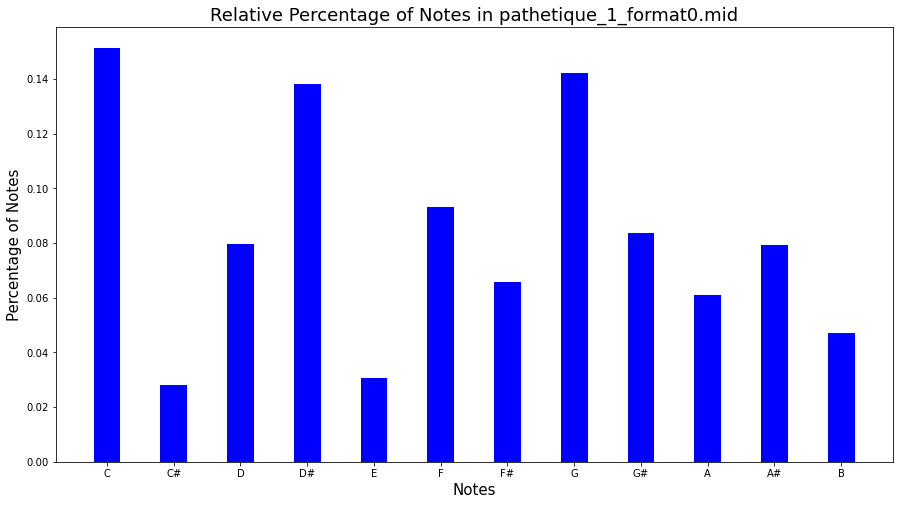

pathetique_2_format0.mid Estimated Tempo is: 197.25 BPM


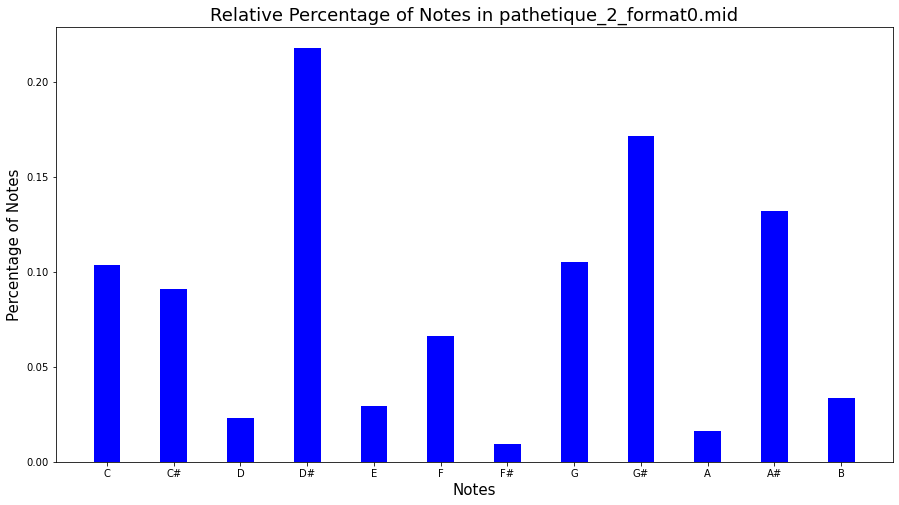

pathetique_3_format0.mid Estimated Tempo is: 186.7 BPM


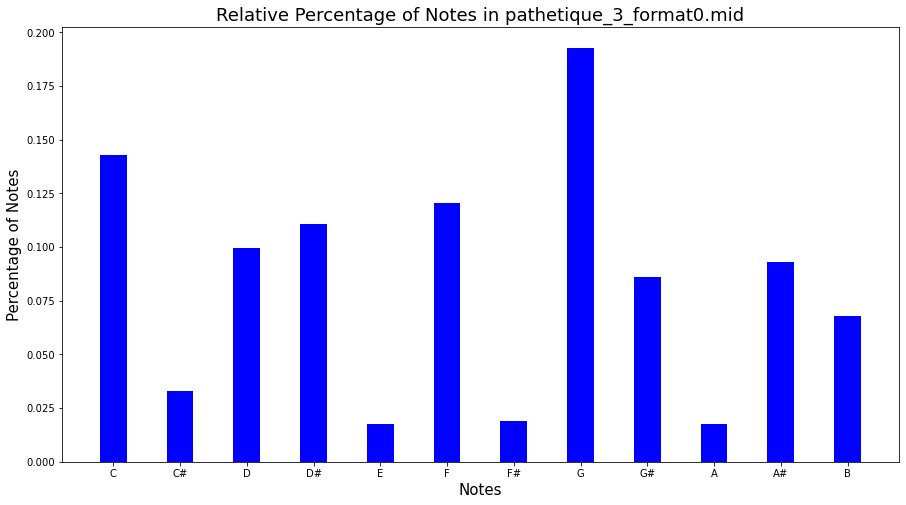

waldstein_1_format0.mid Estimated Tempo is: 173.3 BPM


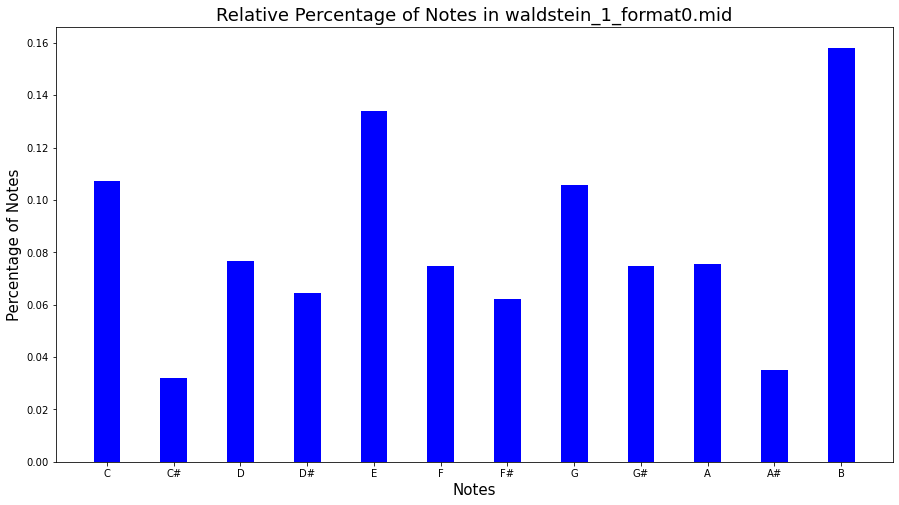

waldstein_2_format0.mid Estimated Tempo is: 101.81 BPM


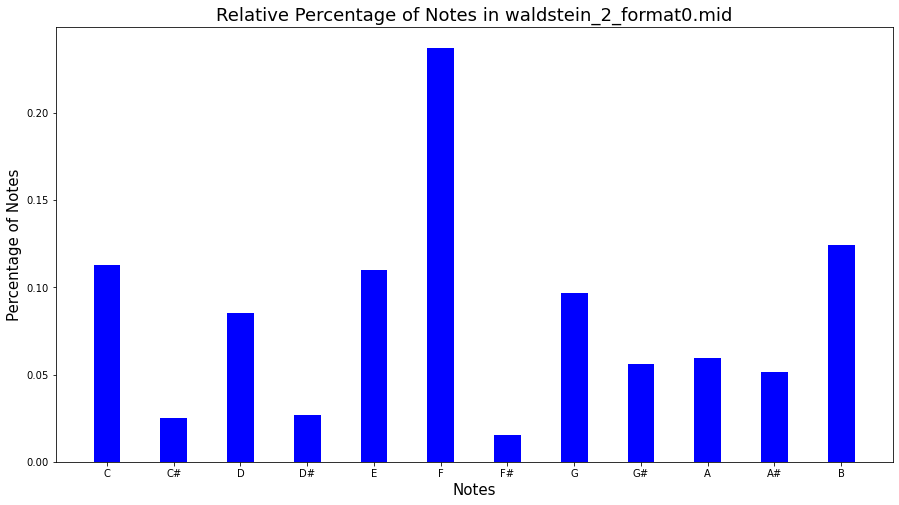

waldstein_3_format0.mid Estimated Tempo is: 179.76 BPM


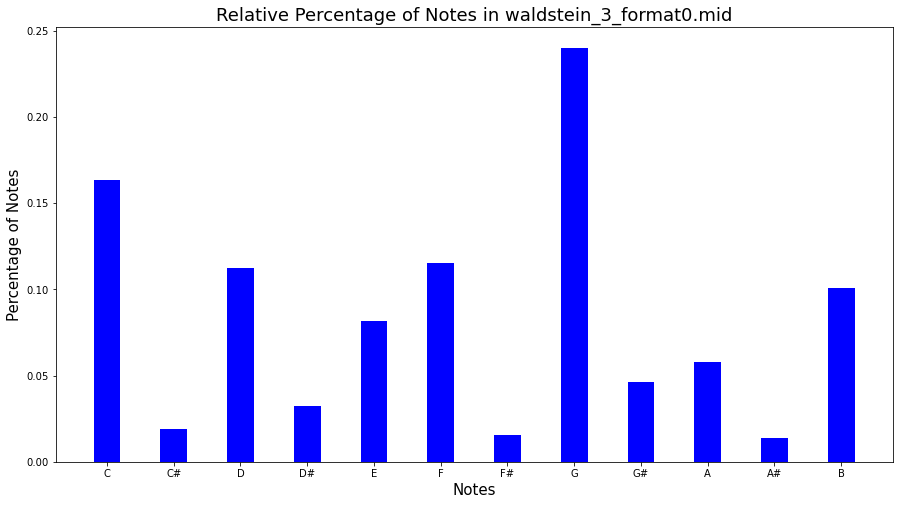

In [3]:
n_x = 100
# Number of possible keys
max_T_x = 1000
# Maximum length for each training piece
sequence_length = 20
# Sequence length for the inputs of the model
T_y_generated = 200
# Length of the sequence for our generated output

# We truncate the duration of each example to the first T_x data
X_list = []

for midiFile in midiFile_l:
    # read the MIDI file
    midi_data = pretty_midi.PrettyMIDI(midiFile)
    note_l = [note.pitch for note in midi_data.instruments[0].notes]
    
    print(midiFile.split('\\')[1] + " Estimated Tempo is: " + str(midi_data.estimate_tempo().round(2)) + " BPM")
    total_velocity = sum(sum(midi_data.get_chroma()))
    
    # Retrieve Notes Data to plot notes graph for each piece
    relative_semitones = [sum(semitone)/total_velocity for semitone in midi_data.get_chroma()]
    
    # Make a list consisting of all our semitones
    semitone_legend = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    
    # Plot the relevant graph for each piece
    plt.figure(figsize = (15,8))
    plt.bar(semitone_legend, relative_semitones, color = 'blue', width = 0.4)
    plt.xlabel("Notes", fontsize = 15)
    plt.ylabel("Percentage of Notes", fontsize = 15)
    plt.title("Relative Percentage of Notes in " + midiFile.split('\\')[1], fontsize = 18)
    plt.show()

    # convert to one-hot-encoding
    T_x = len(note_l)
    if T_x > max_T_x:
      T_x = max_T_x
    X_ohe = np.zeros((T_x, n_x))
    for t in range(T_x): 
      X_ohe[t, note_l[t]-1] = 1
    # add to the list  
    X_list.append(X_ohe)

The purpose of these plots is to get a gage on what notes are present in the music. Using prior musical knowledge on chord analysis, we can deduce the key chord of each music and thus be able to tell the key signature of the music. This data also tells us the frequency of each notes in the music.

The notes with low occurrences are likely non-key notes. From compositional and performance experiences of these pieces, these notes are typically auxilliary notes or passing notes and add variance to our music. While removing them might yield diatonically better results, the music may end up sounding too boring. Thus, I am hoping that the model can pick up on the patterns which these notes are used as they typically have rules associated.

In [4]:
# Check if our data has been properly encoded with the correct dimensions
print(len(X_list))
print(X_list[0].shape)
print(X_list[1].shape)
print(X_list[2].shape)

22
(1000, 100)
(1000, 100)
(1000, 100)


# Further EDA
Let's start exploring our data more in-depth. We know that there may be different key signatures for these pieces, as well as the frequency of each notes. Let's look at these data points

## Looking at track 1's MIDI Roll
Here is a sneak peak of what our one-hot encoded data look like.

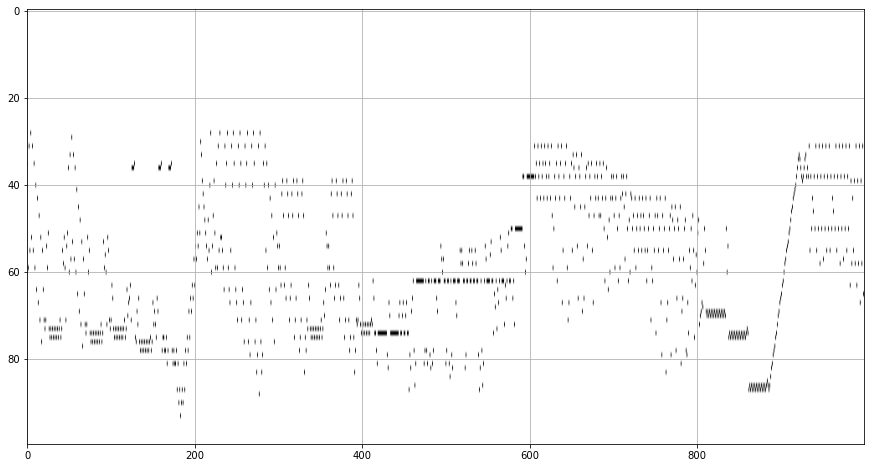

In [5]:
plt.figure(figsize=(15, 8))
# plt.imshow(X_list[1].T, aspect='auto')
plt.imshow(X_list[0].T, aspect='auto')
plt.set_cmap('gray_r')
plt.grid(True)

# Shaping Data for our Model
We need each excerpt of the pieces to be shaped properly so that our model can be trained. To do this, we create 2 sequences:
- An input sequence which contains a sub-sequence of length sequence_length.  
This sub-sequence ranges from the note t to the note t+sequence\_length-1  


- An output sequence which contains the following note to be predicted, the one at position t+sequence\_length. The training is therefore performed by giving to the model a set of sequences as input and asking the network to predict each time the note that should come right after this sequence.

In [6]:
X_train_list = []
y_train_list = []


X_train_list = [X_list[i][t:t+sequence_length] for i in range(len(X_list)) for t in range(len(X_list[i])-sequence_length)]
y_train_list = [X_list[i][t+ sequence_length] for i in range(len(X_list)) for t in range(len(X_list[i])-sequence_length)]

X_train = np.asarray(X_train_list)
y_train = np.asarray(y_train_list)

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (20819, 20, 100)
y_train.shape: (20819, 100)


# Running LSTM-RNN Model
Let's start by running our RNN-LSTM model on our data

### Import Model Libraries

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import Activation
from keras.layers import BatchNormalization as BatchNorm
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Instantiate our LSTM

We will run our model with these following parameters:  


1st layer units = 64  
Dropout layer = 0.3  
2nd layer units = 64  
Dropout layer = 0.3  
3rd layer units = 64  
Dense layer with 64 units  
Another Dropout layer = 0.3  
A Dense layer with a softmax activation  

In [8]:
model = Sequential()
model.add(LSTM(
    64,
    input_shape=(sequence_length, n_x),
    recurrent_dropout=0.3,
    return_sequences=True
))
model.add(LSTM(64, return_sequences=True, recurrent_dropout=0.3,))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(n_x))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# Train the LSTM model

Let's start our model training. The epoch number here can be changed to any numbers. Note that if we were to run with a high epoch, the model will take very long to run.

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=3000)

Epoch 1/3000
163/163 [==============================] - 12s 48ms/step - loss: 4.3149 - acc: 0.0750
Epoch 2/3000
163/163 [==============================] - 8s 48ms/step - loss: 3.7347 - acc: 0.1056
Epoch 3/3000
163/163 [==============================] - 8s 50ms/step - loss: 3.5105 - acc: 0.1096
Epoch 4/3000
163/163 [==============================] - 8s 48ms/step - loss: 3.4136 - acc: 0.1158
Epoch 5/3000
163/163 [==============================] - 7s 40ms/step - loss: 3.3666 - acc: 0.1176
Epoch 6/3000
163/163 [==============================] - 6s 38ms/step - loss: 3.3418 - acc: 0.1216
Epoch 7/3000
163/163 [==============================] - 6s 37ms/step - loss: 3.3161 - acc: 0.1228
Epoch 8/3000
163/163 [==============================] - 6s 38ms/step - loss: 3.2981 - acc: 0.1248
Epoch 9/3000
163/163 [==============================] - 6s 37ms/step - loss: 3.2757 - acc: 0.1286
Epoch 10/3000
163/163 [==============================] - 6s 37ms/step - loss: 3.2612 - acc: 0.1281
Epoch 11/3000
163/

163/163 [==============================] - 6s 38ms/step - loss: 2.7504 - acc: 0.1913
Epoch 84/3000
163/163 [==============================] - 6s 38ms/step - loss: 2.7435 - acc: 0.1938
Epoch 85/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.7522 - acc: 0.1923
Epoch 86/3000
163/163 [==============================] - 6s 38ms/step - loss: 2.7388 - acc: 0.1906
Epoch 87/3000
163/163 [==============================] - 6s 38ms/step - loss: 2.7353 - acc: 0.1967
Epoch 88/3000
163/163 [==============================] - 6s 38ms/step - loss: 2.7304 - acc: 0.1952
Epoch 89/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.7314 - acc: 0.1909
Epoch 90/3000
163/163 [==============================] - 6s 38ms/step - loss: 2.7236 - acc: 0.1973
Epoch 91/3000
163/163 [==============================] - 6s 38ms/step - loss: 2.7096 - acc: 0.2017
Epoch 92/3000
163/163 [==============================] - 6s 38ms/step - loss: 2.7083 - acc: 0.1961
Epoch 93/3000
163/163 [=

163/163 [==============================] - 6s 39ms/step - loss: 2.4203 - acc: 0.2733
Epoch 166/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.4180 - acc: 0.2791
Epoch 167/3000
163/163 [==============================] - 6s 40ms/step - loss: 2.4005 - acc: 0.2778
Epoch 168/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.4058 - acc: 0.2788
Epoch 169/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.4134 - acc: 0.2807
Epoch 170/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.4057 - acc: 0.2771
Epoch 171/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.3996 - acc: 0.2851
Epoch 172/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.3929 - acc: 0.2831
Epoch 173/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.3915 - acc: 0.2824
Epoch 174/3000
163/163 [==============================] - 6s 39ms/step - loss: 2.3899 - acc: 0.2821
Epoch 175/3000


163/163 [==============================] - 7s 44ms/step - loss: 2.1840 - acc: 0.3529
Epoch 248/3000
163/163 [==============================] - 7s 43ms/step - loss: 2.2021 - acc: 0.3443
Epoch 249/3000
163/163 [==============================] - 7s 43ms/step - loss: 2.1878 - acc: 0.3535
Epoch 250/3000
163/163 [==============================] - 7s 42ms/step - loss: 2.1901 - acc: 0.3514
Epoch 251/3000
163/163 [==============================] - 10s 63ms/step - loss: 2.1804 - acc: 0.3528 0s - loss: 2.177
Epoch 252/3000
163/163 [==============================] - 8s 50ms/step - loss: 2.1788 - acc: 0.3506
Epoch 253/3000
163/163 [==============================] - 8s 48ms/step - loss: 2.1949 - acc: 0.3497
Epoch 254/3000
163/163 [==============================] - 8s 48ms/step - loss: 2.1760 - acc: 0.3509
Epoch 255/3000
163/163 [==============================] - 8s 48ms/step - loss: 2.1871 - acc: 0.3492
Epoch 256/3000
163/163 [==============================] - 9s 53ms/step - loss: 2.1708 - acc: 0.35

163/163 [==============================] - 14s 84ms/step - loss: 2.0452 - acc: 0.3928
Epoch 326/3000
163/163 [==============================] - 14s 87ms/step - loss: 2.0410 - acc: 0.3973
Epoch 327/3000
163/163 [==============================] - 14s 86ms/step - loss: 2.0452 - acc: 0.3918
Epoch 328/3000
163/163 [==============================] - 14s 85ms/step - loss: 2.0368 - acc: 0.3997
Epoch 329/3000
163/163 [==============================] - 14s 86ms/step - loss: 2.0457 - acc: 0.3949
Epoch 330/3000
163/163 [==============================] - 14s 87ms/step - loss: 2.0495 - acc: 0.3973
Epoch 331/3000
163/163 [==============================] - 14s 88ms/step - loss: 2.0501 - acc: 0.3949
Epoch 332/3000
163/163 [==============================] - 13s 81ms/step - loss: 2.0474 - acc: 0.3939
Epoch 333/3000
163/163 [==============================] - 13s 81ms/step - loss: 2.0390 - acc: 0.3960
Epoch 334/3000
163/163 [==============================] - 13s 80ms/step - loss: 2.0325 - acc: 0.3953 1s - 

163/163 [==============================] - 14s 85ms/step - loss: 1.9502 - acc: 0.4222
Epoch 402/3000
163/163 [==============================] - 14s 87ms/step - loss: 1.9493 - acc: 0.4249 0s - loss: 1.9492 - acc: 0.4
Epoch 403/3000
163/163 [==============================] - 14s 87ms/step - loss: 1.9606 - acc: 0.4226
Epoch 404/3000
163/163 [==============================] - 15s 89ms/step - loss: 1.9418 - acc: 0.4237
Epoch 405/3000
163/163 [==============================] - 14s 88ms/step - loss: 1.9427 - acc: 0.4239
Epoch 406/3000
163/163 [==============================] - 14s 87ms/step - loss: 1.9503 - acc: 0.4265
Epoch 407/3000
163/163 [==============================] - 14s 86ms/step - loss: 1.9426 - acc: 0.4253 0s - loss: 1.9428 - acc: 0
Epoch 408/3000
163/163 [==============================] - 14s 88ms/step - loss: 1.9443 - acc: 0.4276 1s - loss: 1.9426
Epoch 409/3000
163/163 [==============================] - 14s 84ms/step - loss: 1.9362 - acc: 0.4288
Epoch 410/3000
163/163 [========

163/163 [==============================] - 13s 81ms/step - loss: 1.8788 - acc: 0.4459
Epoch 478/3000
163/163 [==============================] - 13s 82ms/step - loss: 1.8678 - acc: 0.4442
Epoch 479/3000
163/163 [==============================] - 13s 82ms/step - loss: 1.8661 - acc: 0.4510
Epoch 480/3000
163/163 [==============================] - 14s 83ms/step - loss: 1.8575 - acc: 0.4533
Epoch 481/3000
163/163 [==============================] - 14s 83ms/step - loss: 1.8710 - acc: 0.4446 1s - loss: 1
Epoch 482/3000
163/163 [==============================] - 13s 80ms/step - loss: 1.8604 - acc: 0.4470 1s - loss: 1.
Epoch 483/3000
163/163 [==============================] - 14s 84ms/step - loss: 1.8598 - acc: 0.4486 2s - lo
Epoch 484/3000
163/163 [==============================] - 15s 91ms/step - loss: 1.8772 - acc: 0.4496
Epoch 485/3000
163/163 [==============================] - 12s 76ms/step - loss: 1.8543 - acc: 0.4523 1s - l
Epoch 486/3000
163/163 [==============================] - 11s 66

163/163 [==============================] - 10s 60ms/step - loss: 1.8230 - acc: 0.4637 2s - - ETA: 1s - loss: 1.8
Epoch 554/3000
163/163 [==============================] - 9s 57ms/step - loss: 1.8058 - acc: 0.4649
Epoch 555/3000
163/163 [==============================] - 9s 57ms/step - loss: 1.7974 - acc: 0.4671
Epoch 556/3000
163/163 [==============================] - 10s 63ms/step - loss: 1.8038 - acc: 0.4651
Epoch 557/3000
163/163 [==============================] - 11s 66ms/step - loss: 1.8011 - acc: 0.4691 2s - loss: 1.79 - ETA: 1s - loss:
Epoch 558/3000
163/163 [==============================] - 11s 66ms/step - loss: 1.8047 - acc: 0.4672
Epoch 559/3000
163/163 [==============================] - 11s 66ms/step - loss: 1.8025 - acc: 0.4684
Epoch 560/3000
163/163 [==============================] - 11s 65ms/step - loss: 1.7905 - acc: 0.4679
Epoch 561/3000
163/163 [==============================] - 11s 67ms/step - loss: 1.7905 - acc: 0.4673
Epoch 562/3000
163/163 [=======================

163/163 [==============================] - 7s 43ms/step - loss: 1.7692 - acc: 0.4737
Epoch 628/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.7602 - acc: 0.4762
Epoch 629/3000
163/163 [==============================] - 8s 46ms/step - loss: 1.7575 - acc: 0.4766
Epoch 630/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.7512 - acc: 0.4833
Epoch 631/3000
163/163 [==============================] - 7s 44ms/step - loss: 1.7389 - acc: 0.4890
Epoch 632/3000
163/163 [==============================] - 7s 45ms/step - loss: 1.7483 - acc: 0.4826
Epoch 633/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.7424 - acc: 0.4834
Epoch 634/3000
163/163 [==============================] - 7s 44ms/step - loss: 1.7494 - acc: 0.4783
Epoch 635/3000
163/163 [==============================] - 7s 45ms/step - loss: 1.7552 - acc: 0.4781
Epoch 636/3000
163/163 [==============================] - 7s 45ms/step - loss: 1.7517 - acc: 0.4803
Epoch 637/3000


163/163 [==============================] - 7s 42ms/step - loss: 1.7073 - acc: 0.4931
Epoch 710/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.7052 - acc: 0.4948
Epoch 711/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.7034 - acc: 0.4957
Epoch 712/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6979 - acc: 0.4971
Epoch 713/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.7220 - acc: 0.4940
Epoch 714/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.7125 - acc: 0.4906
Epoch 715/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.7133 - acc: 0.4964
Epoch 716/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.7060 - acc: 0.4943
Epoch 717/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6999 - acc: 0.4959
Epoch 718/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6963 - acc: 0.4978
Epoch 719/3000


163/163 [==============================] - 7s 42ms/step - loss: 1.6665 - acc: 0.5050
Epoch 792/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6644 - acc: 0.5056
Epoch 793/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6551 - acc: 0.5065
Epoch 794/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6579 - acc: 0.5079
Epoch 795/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6505 - acc: 0.5078
Epoch 796/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6577 - acc: 0.5125
Epoch 797/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6592 - acc: 0.5110
Epoch 798/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6743 - acc: 0.5045
Epoch 799/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6568 - acc: 0.5080
Epoch 800/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6437 - acc: 0.5113
Epoch 801/3000


163/163 [==============================] - 7s 42ms/step - loss: 1.6188 - acc: 0.5193
Epoch 873/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6399 - acc: 0.5122
Epoch 874/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6249 - acc: 0.5191
Epoch 875/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6175 - acc: 0.5189
Epoch 876/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6178 - acc: 0.5182
Epoch 877/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6306 - acc: 0.5162
Epoch 878/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6121 - acc: 0.5192
Epoch 879/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6259 - acc: 0.5211
Epoch 880/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6379 - acc: 0.5122
Epoch 881/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6316 - acc: 0.5166
Epoch 882/3000


163/163 [==============================] - 7s 43ms/step - loss: 1.5912 - acc: 0.5204
Epoch 954/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5985 - acc: 0.5271: 3s - loss: 1.5881 - acc: 
Epoch 955/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5899 - acc: 0.5280
Epoch 956/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5908 - acc: 0.5257
Epoch 957/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5984 - acc: 0.5245
Epoch 958/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5874 - acc: 0.5284
Epoch 959/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5913 - acc: 0.5281
Epoch 960/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5960 - acc: 0.5240
Epoch 961/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.6036 - acc: 0.5249
Epoch 962/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.6006 - 

163/163 [==============================] - 7s 42ms/step - loss: 1.5658 - acc: 0.5335
Epoch 1035/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5708 - acc: 0.5328
Epoch 1036/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5661 - acc: 0.5344
Epoch 1037/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5694 - acc: 0.5369
Epoch 1038/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5642 - acc: 0.5375
Epoch 1039/3000
163/163 [==============================] - 7s 44ms/step - loss: 1.5787 - acc: 0.5302
Epoch 1040/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5572 - acc: 0.5363
Epoch 1041/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5717 - acc: 0.5342
Epoch 1042/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5613 - acc: 0.5321
Epoch 1043/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5618 - acc: 0.5349
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.5624 - acc: 0.5393
Epoch 1116/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5543 - acc: 0.5351
Epoch 1117/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5446 - acc: 0.5405
Epoch 1118/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5476 - acc: 0.5355
Epoch 1119/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5485 - acc: 0.5405
Epoch 1120/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5464 - acc: 0.5443
Epoch 1121/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5458 - acc: 0.5374
Epoch 1122/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5342 - acc: 0.5443
Epoch 1123/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5354 - acc: 0.5462
Epoch 1124/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5304 - acc: 0.5445
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.5330 - acc: 0.5435
Epoch 1197/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5171 - acc: 0.5477
Epoch 1198/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5219 - acc: 0.5439
Epoch 1199/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5166 - acc: 0.5496
Epoch 1200/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5132 - acc: 0.5486
Epoch 1201/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5270 - acc: 0.5487
Epoch 1202/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5336 - acc: 0.5463
Epoch 1203/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5289 - acc: 0.5416
Epoch 1204/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.5213 - acc: 0.5499
Epoch 1205/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5235 - acc: 0.5464
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.4915 - acc: 0.5585
Epoch 1278/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4851 - acc: 0.5517
Epoch 1279/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5051 - acc: 0.5504
Epoch 1280/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5112 - acc: 0.5518
Epoch 1281/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4941 - acc: 0.5539
Epoch 1282/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5026 - acc: 0.5524
Epoch 1283/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4999 - acc: 0.5607
Epoch 1284/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5037 - acc: 0.5517
Epoch 1285/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.5060 - acc: 0.5518
Epoch 1286/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4974 - acc: 0.5568
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.4916 - acc: 0.5598
Epoch 1359/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4835 - acc: 0.5548
Epoch 1360/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4769 - acc: 0.5595
Epoch 1361/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4818 - acc: 0.5587
Epoch 1362/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4777 - acc: 0.5626
Epoch 1363/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4849 - acc: 0.5562
Epoch 1364/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4759 - acc: 0.5611
Epoch 1365/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4787 - acc: 0.5583
Epoch 1366/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4970 - acc: 0.5590
Epoch 1367/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4915 - acc: 0.5548
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.4597 - acc: 0.5645
Epoch 1440/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4803 - acc: 0.5615
Epoch 1441/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4629 - acc: 0.5645
Epoch 1442/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4776 - acc: 0.5593
Epoch 1443/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4686 - acc: 0.5628
Epoch 1444/3000
163/163 [==============================] - 7s 44ms/step - loss: 1.4675 - acc: 0.5654
Epoch 1445/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4651 - acc: 0.5614
Epoch 1446/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4655 - acc: 0.5649
Epoch 1447/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4658 - acc: 0.5653
Epoch 1448/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4735 - acc: 0.5650
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.4419 - acc: 0.5679
Epoch 1521/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4542 - acc: 0.5689
Epoch 1522/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4471 - acc: 0.5690
Epoch 1523/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4575 - acc: 0.5685
Epoch 1524/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4402 - acc: 0.5705
Epoch 1525/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4457 - acc: 0.5696
Epoch 1526/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4437 - acc: 0.5674
Epoch 1527/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4453 - acc: 0.5651
Epoch 1528/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4553 - acc: 0.5659
Epoch 1529/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4517 - acc: 0.5700
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.4213 - acc: 0.5763
Epoch 1602/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4479 - acc: 0.5713
Epoch 1603/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4440 - acc: 0.5701
Epoch 1604/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4408 - acc: 0.5727
Epoch 1605/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4264 - acc: 0.5742
Epoch 1606/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4142 - acc: 0.5732
Epoch 1607/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4293 - acc: 0.5728
Epoch 1608/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4262 - acc: 0.5737
Epoch 1609/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4425 - acc: 0.5718
Epoch 1610/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4464 - acc: 0.5707
Epoch 

163/163 [==============================] - 7s 44ms/step - loss: 1.4117 - acc: 0.5812
Epoch 1682/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4225 - acc: 0.5758
Epoch 1683/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4277 - acc: 0.5736
Epoch 1684/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4255 - acc: 0.5767
Epoch 1685/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3986 - acc: 0.5817
Epoch 1686/3000
163/163 [==============================] - 7s 44ms/step - loss: 1.4210 - acc: 0.5782
Epoch 1687/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4197 - acc: 0.5764
Epoch 1688/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4202 - acc: 0.5781
Epoch 1689/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4117 - acc: 0.5794
Epoch 1690/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4148 - acc: 0.5760
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.3995 - acc: 0.5846
Epoch 1763/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3937 - acc: 0.5848
Epoch 1764/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4059 - acc: 0.5778
Epoch 1765/3000
163/163 [==============================] - 7s 45ms/step - loss: 1.4196 - acc: 0.5755
Epoch 1766/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3964 - acc: 0.5821
Epoch 1767/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4106 - acc: 0.5804
Epoch 1768/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4027 - acc: 0.5810
Epoch 1769/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4093 - acc: 0.5809
Epoch 1770/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4012 - acc: 0.5798
Epoch 1771/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.4114 - acc: 0.5812
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.3954 - acc: 0.5851
Epoch 1844/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3999 - acc: 0.5812
Epoch 1845/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.4086 - acc: 0.5774
Epoch 1846/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3958 - acc: 0.5843
Epoch 1847/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3915 - acc: 0.5824
Epoch 1848/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3782 - acc: 0.5888
Epoch 1849/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3917 - acc: 0.5848
Epoch 1850/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3877 - acc: 0.5859
Epoch 1851/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3941 - acc: 0.5818
Epoch 1852/3000
163/163 [==============================] - 7s 45ms/step - loss: 1.3862 - acc: 0.5834
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.3818 - acc: 0.5873
Epoch 1925/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3740 - acc: 0.5902
Epoch 1926/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3796 - acc: 0.5884
Epoch 1927/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3705 - acc: 0.5912
Epoch 1928/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3906 - acc: 0.5855
Epoch 1929/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3783 - acc: 0.5861
Epoch 1930/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3752 - acc: 0.5904
Epoch 1931/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3895 - acc: 0.5836
Epoch 1932/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3726 - acc: 0.5899
Epoch 1933/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3592 - acc: 0.5907
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.3753 - acc: 0.5899
Epoch 2006/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3806 - acc: 0.5881
Epoch 2007/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3531 - acc: 0.5962
Epoch 2008/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3707 - acc: 0.5902
Epoch 2009/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3662 - acc: 0.5937
Epoch 2010/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3645 - acc: 0.5921
Epoch 2011/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3710 - acc: 0.5879
Epoch 2012/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3757 - acc: 0.5878
Epoch 2013/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3746 - acc: 0.5851
Epoch 2014/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3661 - acc: 0.5915
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.3611 - acc: 0.5943
Epoch 2087/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3492 - acc: 0.5930
Epoch 2088/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3564 - acc: 0.5940
Epoch 2089/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3648 - acc: 0.5927
Epoch 2090/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3595 - acc: 0.5960
Epoch 2091/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3631 - acc: 0.5898
Epoch 2092/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3593 - acc: 0.5958
Epoch 2093/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3555 - acc: 0.5961
Epoch 2094/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3633 - acc: 0.5940
Epoch 2095/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3638 - acc: 0.5947
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.3631 - acc: 0.5934
Epoch 2168/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3458 - acc: 0.5975
Epoch 2169/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3465 - acc: 0.5952
Epoch 2170/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3518 - acc: 0.5937
Epoch 2171/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3496 - acc: 0.5971
Epoch 2172/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3401 - acc: 0.6001
Epoch 2173/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3624 - acc: 0.5901
Epoch 2174/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3424 - acc: 0.5977
Epoch 2175/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3380 - acc: 0.6019
Epoch 2176/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3580 - acc: 0.5930
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.3467 - acc: 0.5989
Epoch 2249/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3317 - acc: 0.6020
Epoch 2250/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3251 - acc: 0.6036
Epoch 2251/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3307 - acc: 0.5995
Epoch 2252/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3395 - acc: 0.5952
Epoch 2253/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3392 - acc: 0.6032
Epoch 2254/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3406 - acc: 0.5985
Epoch 2255/3000
163/163 [==============================] - 7s 44ms/step - loss: 1.3236 - acc: 0.6058
Epoch 2256/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3315 - acc: 0.6026
Epoch 2257/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3272 - acc: 0.6048
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.3218 - acc: 0.6066
Epoch 2330/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3327 - acc: 0.6011
Epoch 2331/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3275 - acc: 0.6030
Epoch 2332/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3145 - acc: 0.6046
Epoch 2333/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3264 - acc: 0.6055
Epoch 2334/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3279 - acc: 0.6066
Epoch 2335/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3226 - acc: 0.6078
Epoch 2336/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3075 - acc: 0.6074
Epoch 2337/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3335 - acc: 0.6056
Epoch 2338/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3244 - acc: 0.6034
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.3165 - acc: 0.6046
Epoch 2411/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3117 - acc: 0.6101
Epoch 2412/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3192 - acc: 0.6033
Epoch 2413/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3287 - acc: 0.6040
Epoch 2414/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3074 - acc: 0.6061
Epoch 2415/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3109 - acc: 0.6093
Epoch 2416/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3094 - acc: 0.6103
Epoch 2417/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3216 - acc: 0.6012
Epoch 2418/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3177 - acc: 0.6054
Epoch 2419/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3198 - acc: 0.6050
Epoch 

163/163 [==============================] - 7s 43ms/step - loss: 1.3273 - acc: 0.6054
Epoch 2492/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3141 - acc: 0.6046
Epoch 2493/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3046 - acc: 0.6110
Epoch 2494/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3103 - acc: 0.6097
Epoch 2495/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3253 - acc: 0.6048
Epoch 2496/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3118 - acc: 0.6090
Epoch 2497/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2974 - acc: 0.6138
Epoch 2498/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3085 - acc: 0.6034
Epoch 2499/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3209 - acc: 0.6090
Epoch 2500/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3151 - acc: 0.6101
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.3107 - acc: 0.6066
Epoch 2573/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2860 - acc: 0.6164
Epoch 2574/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3066 - acc: 0.6108
Epoch 2575/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3029 - acc: 0.6089
Epoch 2576/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3085 - acc: 0.6055
Epoch 2577/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3082 - acc: 0.6061
Epoch 2578/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2954 - acc: 0.6126
Epoch 2579/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2965 - acc: 0.6134
Epoch 2580/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2958 - acc: 0.6128
Epoch 2581/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2951 - acc: 0.6131
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.2882 - acc: 0.6142
Epoch 2654/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3059 - acc: 0.6101: 0s - loss: 1.3057 - acc: 0.61
Epoch 2655/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2903 - acc: 0.6113
Epoch 2656/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2780 - acc: 0.6175
Epoch 2657/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2857 - acc: 0.6151
Epoch 2658/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2956 - acc: 0.6119
Epoch 2659/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2950 - acc: 0.6109
Epoch 2660/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.3196 - acc: 0.6052
Epoch 2661/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2853 - acc: 0.6163
Epoch 2662/3000
163/163 [==============================] - 7s 43ms/step - lo

163/163 [==============================] - 7s 42ms/step - loss: 1.2800 - acc: 0.6140
Epoch 2734/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2872 - acc: 0.6139
Epoch 2735/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2893 - acc: 0.6146
Epoch 2736/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2804 - acc: 0.6215
Epoch 2737/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2836 - acc: 0.6153
Epoch 2738/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2972 - acc: 0.6123
Epoch 2739/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2726 - acc: 0.6189
Epoch 2740/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2936 - acc: 0.6118
Epoch 2741/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2844 - acc: 0.6140
Epoch 2742/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.3003 - acc: 0.6082
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.2746 - acc: 0.6154
Epoch 2815/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2783 - acc: 0.6169
Epoch 2816/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2780 - acc: 0.6191
Epoch 2817/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2789 - acc: 0.6184
Epoch 2818/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2795 - acc: 0.6144
Epoch 2819/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2882 - acc: 0.6166
Epoch 2820/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2743 - acc: 0.6200
Epoch 2821/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2767 - acc: 0.6189
Epoch 2822/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2927 - acc: 0.6149
Epoch 2823/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2795 - acc: 0.6165
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.2738 - acc: 0.6221
Epoch 2896/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2762 - acc: 0.6147
Epoch 2897/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2893 - acc: 0.6149
Epoch 2898/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2733 - acc: 0.6200
Epoch 2899/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2668 - acc: 0.6203
Epoch 2900/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2722 - acc: 0.6174
Epoch 2901/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2852 - acc: 0.6132
Epoch 2902/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2694 - acc: 0.6198
Epoch 2903/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2669 - acc: 0.6185
Epoch 2904/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2564 - acc: 0.6213
Epoch 

163/163 [==============================] - 7s 42ms/step - loss: 1.2494 - acc: 0.6238
Epoch 2977/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2749 - acc: 0.6228
Epoch 2978/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2545 - acc: 0.6220
Epoch 2979/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2758 - acc: 0.6158
Epoch 2980/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2585 - acc: 0.6215
Epoch 2981/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2607 - acc: 0.6262
Epoch 2982/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2645 - acc: 0.6204
Epoch 2983/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2564 - acc: 0.6246
Epoch 2984/3000
163/163 [==============================] - 7s 42ms/step - loss: 1.2708 - acc: 0.6225
Epoch 2985/3000
163/163 [==============================] - 7s 43ms/step - loss: 1.2608 - acc: 0.6190
Epoch 

### Plot Accuracy Graph

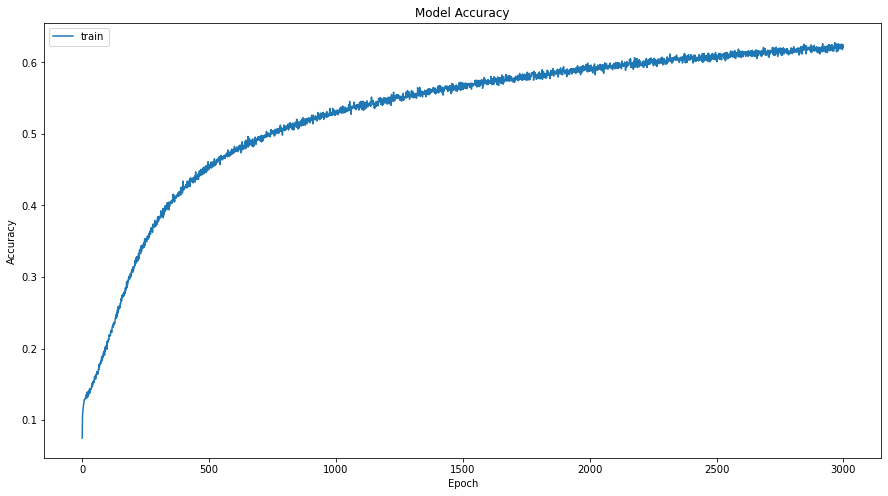

In [10]:
# summarize history for accuracy
plt.figure(figsize = (15,8))
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show();

### Plot Model Loss Graph

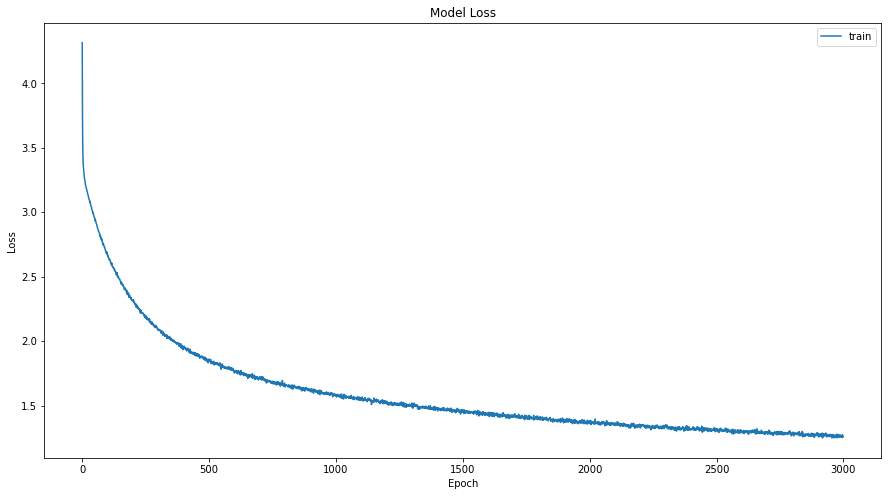

In [11]:
# summarize history for accuracy
plt.figure(figsize = (15,8))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show();

Our Accuracy graph is generally increasing the more training epochs the model goes through, which is expected. The Loss also decreases with each epochs. This indicates that the model is training properly.

Note that in Music Generation from Machine Learning Models, we do not want the model to be highly accurate. This results in overfitting and indicates that the model regurgitating training data, and is undesirable. Keep in mind that the objective of this project is to generate original music in the style of Beethoven, not to repeat exact materials or extracts from the Beethoven's Sonatas.

# Generate Music
Let's use our LSTM model to generate our music.

In [12]:
# Select a random starting pattern
import random

np.random.seed(10)
start = np.random.randint(0, len(X_train_list)-1)
pattern = X_train_list[start]
print(start)
print(pattern.shape)
print(np.expand_dims(pattern, 0).shape)

note_l = []
prediction_l = []

# Generate T_y_generated notes
for note_index in range(T_y_generated):
    pred = model.predict(np.expand_dims(pattern[note_index:,:], 0))
    prediction_l.append(pred)
    note = np.argmax(pred, axis=1)
    note_l.append(note)
    note_ohe = np.zeros(n_x)
    note_ohe[note] = 1
    pattern = np.vstack((pattern, note_ohe))

17673
(20, 100)
(1, 20, 100)


# Display and Produce Generated Music

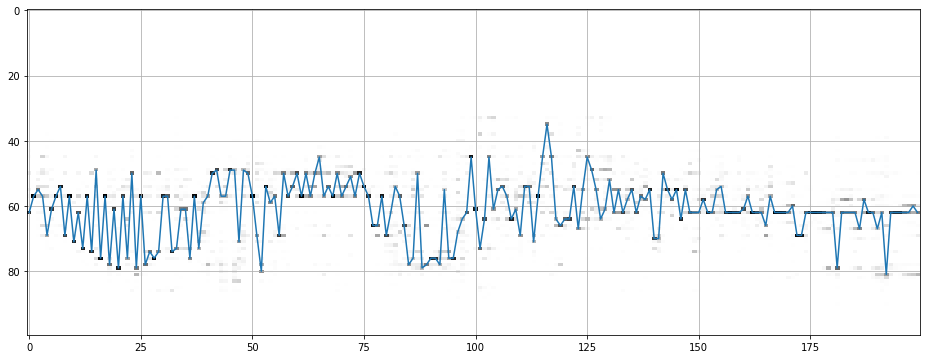

In [13]:
plt.figure(figsize=(16, 6))
plt.imshow(np.asarray(prediction_l)[:,0,:].T, aspect='auto')
plt.plot(note_l)
plt.set_cmap('gray_r')
plt.grid(True)

In [14]:
new_midi_data = pretty_midi.PrettyMIDI()
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)
time = 0
step = 0.3

for note_number in note_l:
    myNote = pretty_midi.Note(velocity=100, pitch=note_number, start=time, end=time+step)
    cello.notes.append(myNote)
    time += step
new_midi_data.instruments.append(cello)

audio_data = new_midi_data.synthesize()
IPython.display.Audio(audio_data, rate=44100)

# Continuation

We have generated our music. The generated music is manually saved in the `output` folder for our listening pleasure.

Due to GitHub restrictions, the `output` folder will be left empty. Here is the link to the actual generated music:
https://drive.google.com/drive/folders/1D162XP9uDOglr2yP9tMDASadikF1L9Os?usp=sharing

We will explore Convolutional Neural Network in `cnn` file and continue from there.

---------------------